In [1]:
import os
import sys
import numpy as np
import pandas as pd
import pysubgroup as ps

In [2]:
sys.path.append(os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),'sd-4sql\\packages'))
saved_path = os.path.join(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))),'Data\\saved-data\\')

In [3]:
from sd_analysis import *
from subgroup_discovery import *
from sd_postprocessing import *

In [4]:
import matplotlib.pyplot as plt
import matplotlib

In [5]:
import warnings
warnings.filterwarnings("ignore")

### Servers with blocking session issues

In [6]:
queries = pd.read_csv(saved_path + 'dataset-d4.csv')

## Use cases 3 : Blocking sessions alert

#### Support

In [7]:
result_supp = sd_binary_conds (queries, dict_conds = {},_target = 'blockedSessions_disc', mesure  = 'Support',_depth  = 1,
                               threshold = 10000, result_size = 100, algorithm   = 'Beam Search', _beam_width = 100,
                               features_ignore = ['blockedSessions'])
res_supp = result_supp.to_dataframe()

#### Lift

In [8]:
result_lift = sd_binary_conds (queries, dict_conds = {},_target = 'blockedSessions_disc', mesure  = 'Lift',_depth  = 1,
                               threshold = 10000, result_size = 100, algorithm   = 'Beam Search', _beam_width = 100,
                               features_ignore = ['blockedSessions'])
res_lift = result_lift.to_dataframe()

#### WRAcc

In [9]:
result_wracc = sd_binary_conds (queries, dict_conds = {},_target = 'blockedSessions_disc', mesure  = 'WRAcc',_depth  = 1,
                                threshold = 10000, result_size = 100, algorithm   = 'Beam Search', _beam_width = 100,
                                features_ignore = ['blockedSessions'])
res_wracc = result_wracc.to_dataframe()

#### Binomial

In [10]:
result_binomial = sd_binary_conds (queries, dict_conds = {},_target = 'blockedSessions_disc', mesure  = 'Binomial',
                                   _depth  = 1,threshold = 10000, result_size = 100, algorithm   = 'Beam Search',
                                   _beam_width = 100,features_ignore = ['blockedSessions'])
res_binomial = result_binomial.to_dataframe()

#### Post-processing

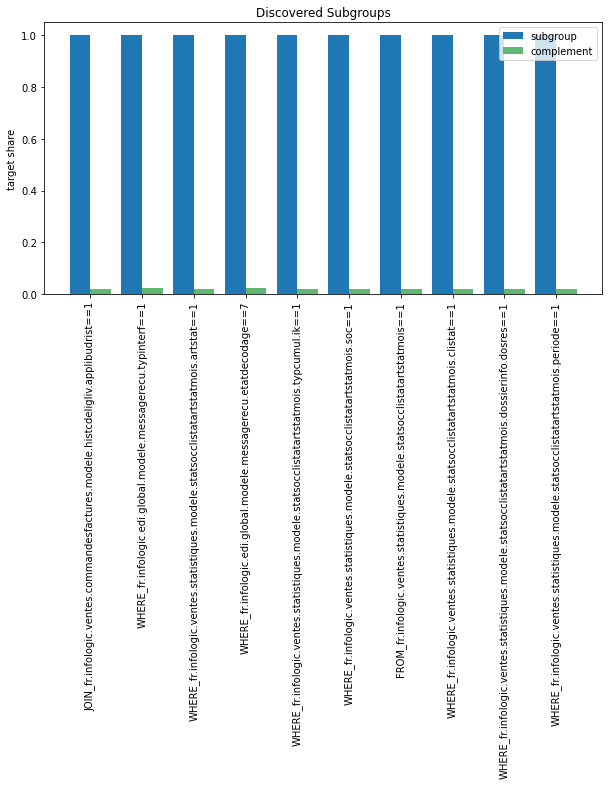

In [11]:
plot_sgbars(res_lift, 10, ylabel="target share", title="Discovered Subgroups", dynamic_widths=False, _suffix="")

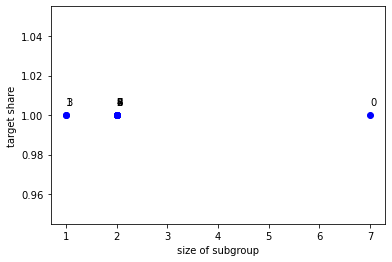

In [12]:
plot_npspace(res_lift, 10, queries, annotate=True, fixed_limits=False)

In [13]:
d, d_names, sg_names = greedy_jaccard(result_lift.to_descriptions(),10, queries, 0.8)
for sg in d_names.keys() :
    print(sg)

JOIN_fr.infologic.ventes.commandesfactures.modele.histcdeligliv.applibudrist==1
WHERE_fr.infologic.edi.global.modele.messagerecu.typinterf==1
WHERE_fr.infologic.ventes.statistiques.modele.statsocclistatartstatmois.artstat==1
WHERE_fr.infologic.edi.global.modele.messagerecu.etatdecodage==7


In [14]:
similarity_sgs(result_lift.to_descriptions(), 10, queries, color=True)

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


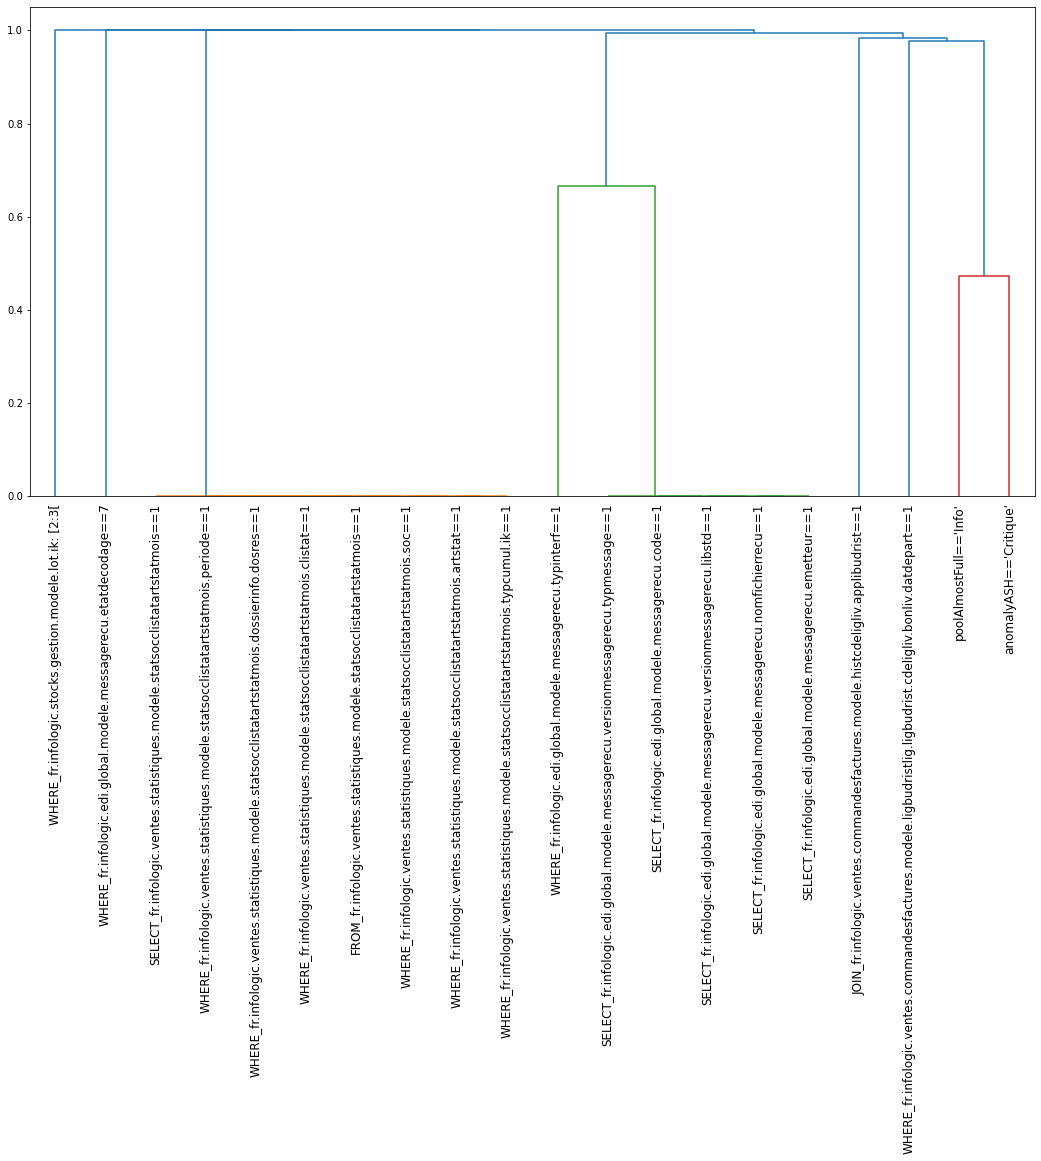

In [19]:
similarity_dendrogram(result_lift.to_descriptions(), 20, queries)

WHERE_fr.infologic.stocks.gestion.modele.lot.ik: [2:3[
WHERE_fr.infologic.edi.global.modele.messagerecu.etatdecodage==7
WHERE_fr.infologic.ventes.statistiques.modele.statsocclistatartstatmois.artstat==1
SELECT_fr.infologic.ventes.statistiques.modele.statsocclistatartstatmois==1
SELECT_fr.infologic.edi.global.modele.messagerecu.versionmessagerecu.libstd==1
0.005617977528089901


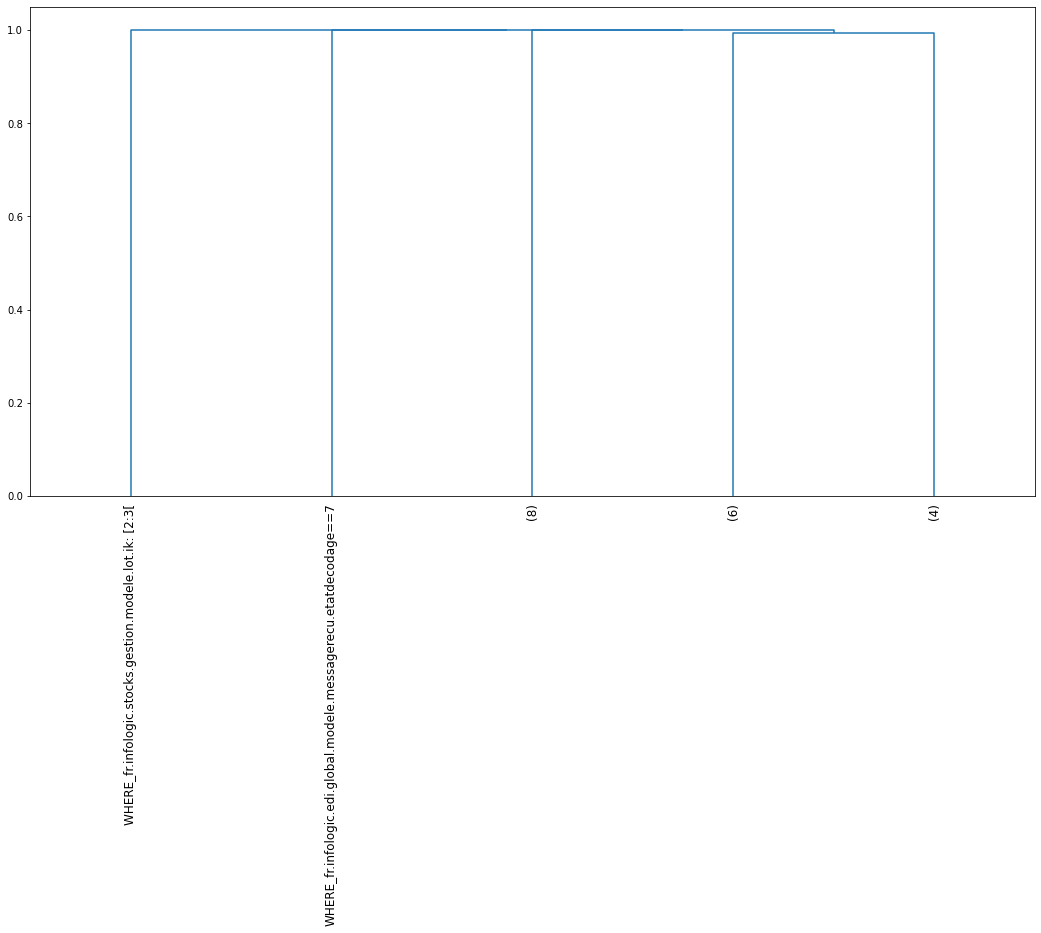

In [15]:
indices = similarity_dendrogram(result_lift.to_descriptions(), 20, queries,truncated = True, p = 5)

In [16]:
res_raf = res_lift[res_lift.index.isin(indices)]

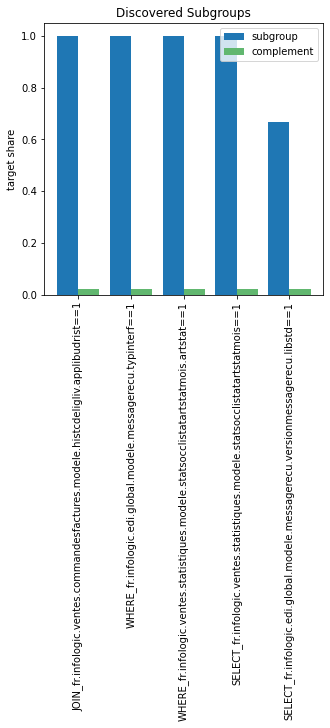

In [17]:
plot_sgbars(res_raf, res_raf.shape[0], ylabel="target share", title="Discovered Subgroups", 
            dynamic_widths=False, _suffix="")

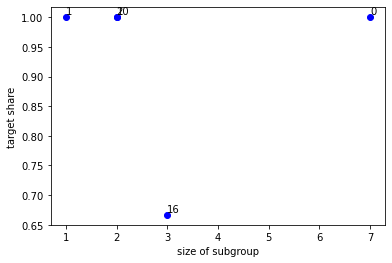

In [18]:
plot_npspace(res_raf, res_raf.shape[0], queries, annotate=True, fixed_limits=False)